In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.options.mode.chained_assignment = None

In [2]:
bathingwaterquality = pd.read_csv('/Users/emilyrumer/Documents/UNI/YEAR 4/GEOG5303M Creative Coding/5 Bathing Water Quality/Pycharm/ELbathingwaterquality.csv')
bathingwaterquality.head()

,date,Site 1 EC Inv,Site 1 IE Inv,rainfall_last_24h,rainfall_last_48h,rainfall_last_72h,uv_average_24h,windspeed_average_24h,Tide Astronomical (MaOD),Spring High,Spring Low,Neap High,Neap low,Flow (l/s),UV Transmittance 1,UV Applied Dose_1,Hubac log (10) Gene Copies / 100ml,UVIndex,Wind_Sp,Wind_Dir
0,2023-06-20 13:00:00,10,18,6.8,32.0,32.0,1.625000,2.778333,-1.66,3.3,-2.87,1.14,-0.27,306.77795,42.906,44.396,NaN,3,4.79,70
1,2023-06-28 09:45:00,8,2,2.0,2.0,7.2,1.666667,3.664167,1.03,3.3,-2.87,1.14,-0.27,123.11206,47.912,112.234,NaN,4,3.92,221
2,2023-07-11 07:00:00,80,340,3.6,5.8,8.0,1.958333,4.873333,-0.09,3.3,-2.87,1.14,-0.27,319.96477,46.593,42.051,NaN,2,4.52,247
3,2023-07-11 07:30:00,85,310,4.0,6.2,8.4,1.958333,4.873333,0.31,3.3,-2.87,1.14,-0.27,146.42635,47.302,61.832,NaN,2,4.52,247
4,2023-07-11 08:00:00,20,26,4.0,6.2,8.4,1.916667,4.952500,0.71,3.3,-2.87,1.14,-0.27,334.31203,46.691,26.813,NaN,3,4.82,237


In [3]:
print(bathingwaterquality.columns)

Index(['date', 'Site 1 EC Inv', 'Site 1 IE Inv', 'rainfall_last_24h',
       'rainfall_last_48h', 'rainfall_last_72h', 'uv_average_24h',
       'windspeed_average_24h', 'Tide Astronomical (MaOD)', 'Spring High',
       'Spring Low', 'Neap High', 'Neap low', 'Flow (l/s)',
       'UV Transmittance 1', 'UV Applied Dose_1',
       'Hubac log (10) Gene Copies / 100ml', 'UVIndex', 'Wind_Sp', 'Wind_Dir'],
      dtype='object')


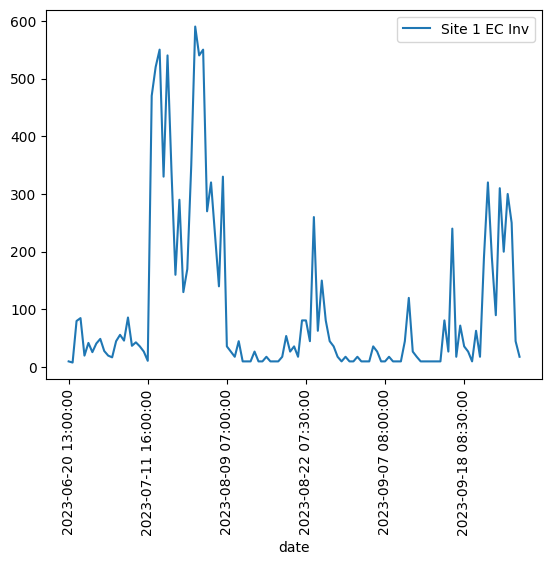

In [4]:
#shows the pattern of bacteria over the investigation sample season
bathingwaterquality.plot(x = 'date', y = 'Site 1 EC Inv')
plt.xticks(rotation="vertical")
plt.show()

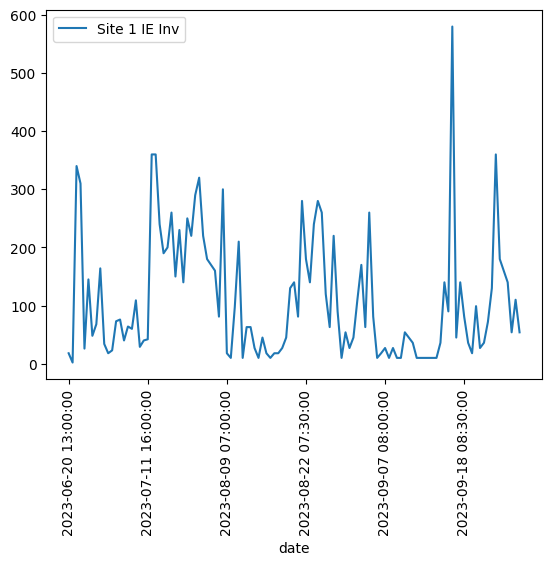

In [5]:
#shows the pattern of bacteria over the investigation sample season
bathingwaterquality.plot(x = 'date', y = 'Site 1 IE Inv')
plt.xticks(rotation="vertical")
plt.show()

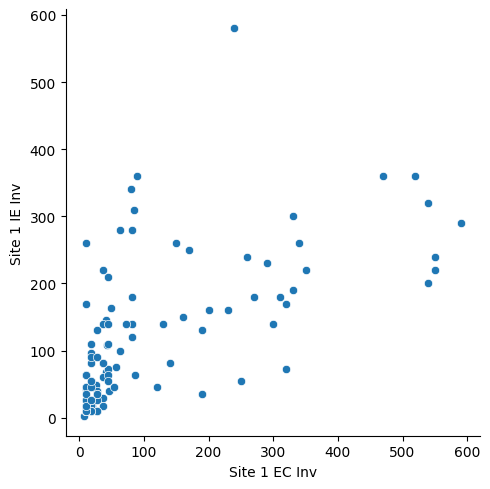

In [6]:
#individual relationships
sns.relplot(data = bathingwaterquality, x='Site 1 EC Inv', y='Site 1 IE Inv')
plt.show()

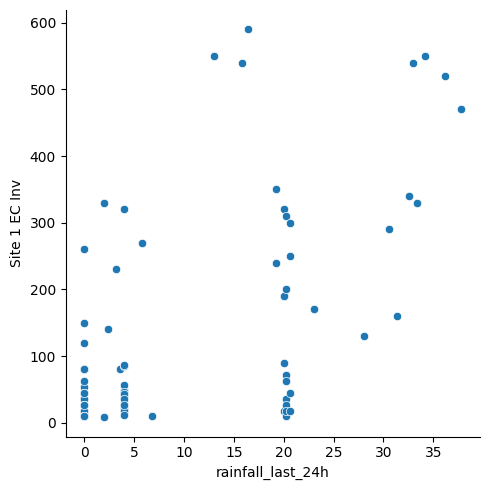

In [7]:
sns.relplot(data = bathingwaterquality, x='rainfall_last_24h', y='Site 1 EC Inv')
plt.show()

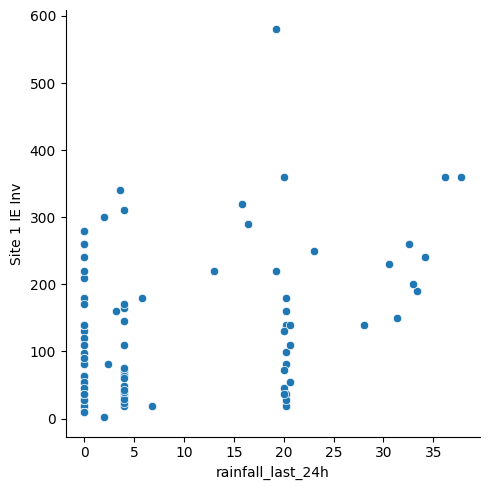

In [8]:
sns.relplot(data = bathingwaterquality, x='rainfall_last_24h', y='Site 1 IE Inv')
plt.show()

In [9]:
bathingwaterquality['rainfall_last_24h'].dtype

dtype('float64')

In [10]:
bathingwaterquality['rainfall_last_24h']

0       6.8
1       2.0
2       3.6
3       4.0
4       4.0
       ... 
110    20.2
111    20.6
112    20.6
113    20.6
114    20.6
Name: rainfall_last_24h, Length: 115, dtype: float64

In [11]:
bathingwaterquality

,date,Site 1 EC Inv,Site 1 IE Inv,rainfall_last_24h,rainfall_last_48h,rainfall_last_72h,uv_average_24h,windspeed_average_24h,Tide Astronomical (MaOD),Spring High,Spring Low,Neap High,Neap low,Flow (l/s),UV Transmittance 1,UV Applied Dose_1,Hubac log (10) Gene Copies / 100ml,UVIndex,Wind_Sp,Wind_Dir
0,2023-06-20 13:00:00,10,18,6.8,32.0,32.0,1.625000,2.778333,-1.66,3.3,-2.87,1.14,-0.27,306.77795,42.906,44.396,NaN,3,4.79,70
1,2023-06-28 09:45:00,8,2,2.0,2.0,7.2,1.666667,3.664167,1.03,3.3,-2.87,1.14,-0.27,123.11206,47.912,112.234,NaN,4,3.92,221
2,2023-07-11 07:00:00,80,340,3.6,5.8,8.0,1.958333,4.873333,-0.09,3.3,-2.87,1.14,-0.27,319.96477,46.593,42.051,NaN,2,4.52,247
3,2023-07-11 07:30:00,85,310,4.0,6.2,8.4,1.958333,4.873333,0.31,3.3,-2.87,1.14,-0.27,146.42635,47.302,61.832,NaN,2,4.52,247
4,2023-07-11 08:00:00,20,26,4.0,6.2,8.4,1.916667,4.952500,0.71,3.3,-2.87,1.14,-0.27,334.31203,46.691,26.813,NaN,3,4.82,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2023-09-18 13:30:00,200,160,20.2,21.0,21.2,0.916667,5.525000,-1.95,3.3,-2.87,1.14,-0.27,NaN,56.190,42.344,NaN,2,6.74,266
111,2023-09-18 14:00:00,300,140,20.6,21.4,21.6,0.916667,5.525417,-1.53,3.3,-2.87,1.14,-0.27,NaN,56.190,42.051,NaN,2,6.47,272
112,2023-09-18 14:30:00,250,54,20.6,21.4,21.6,0.916667,5.525417,-1.00,3.3,-2.87,1.14,-0.27,NaN,57.192,43.223,NaN,2,6.47,272
113,2023-09-18 15:00:00,45,110,20.6,21.4,21.6,0.875000,5.536250,-0.41,3.3,-2.87,1.14,-0.27,NaN,57.705,39.267,NaN,1,6.49,259


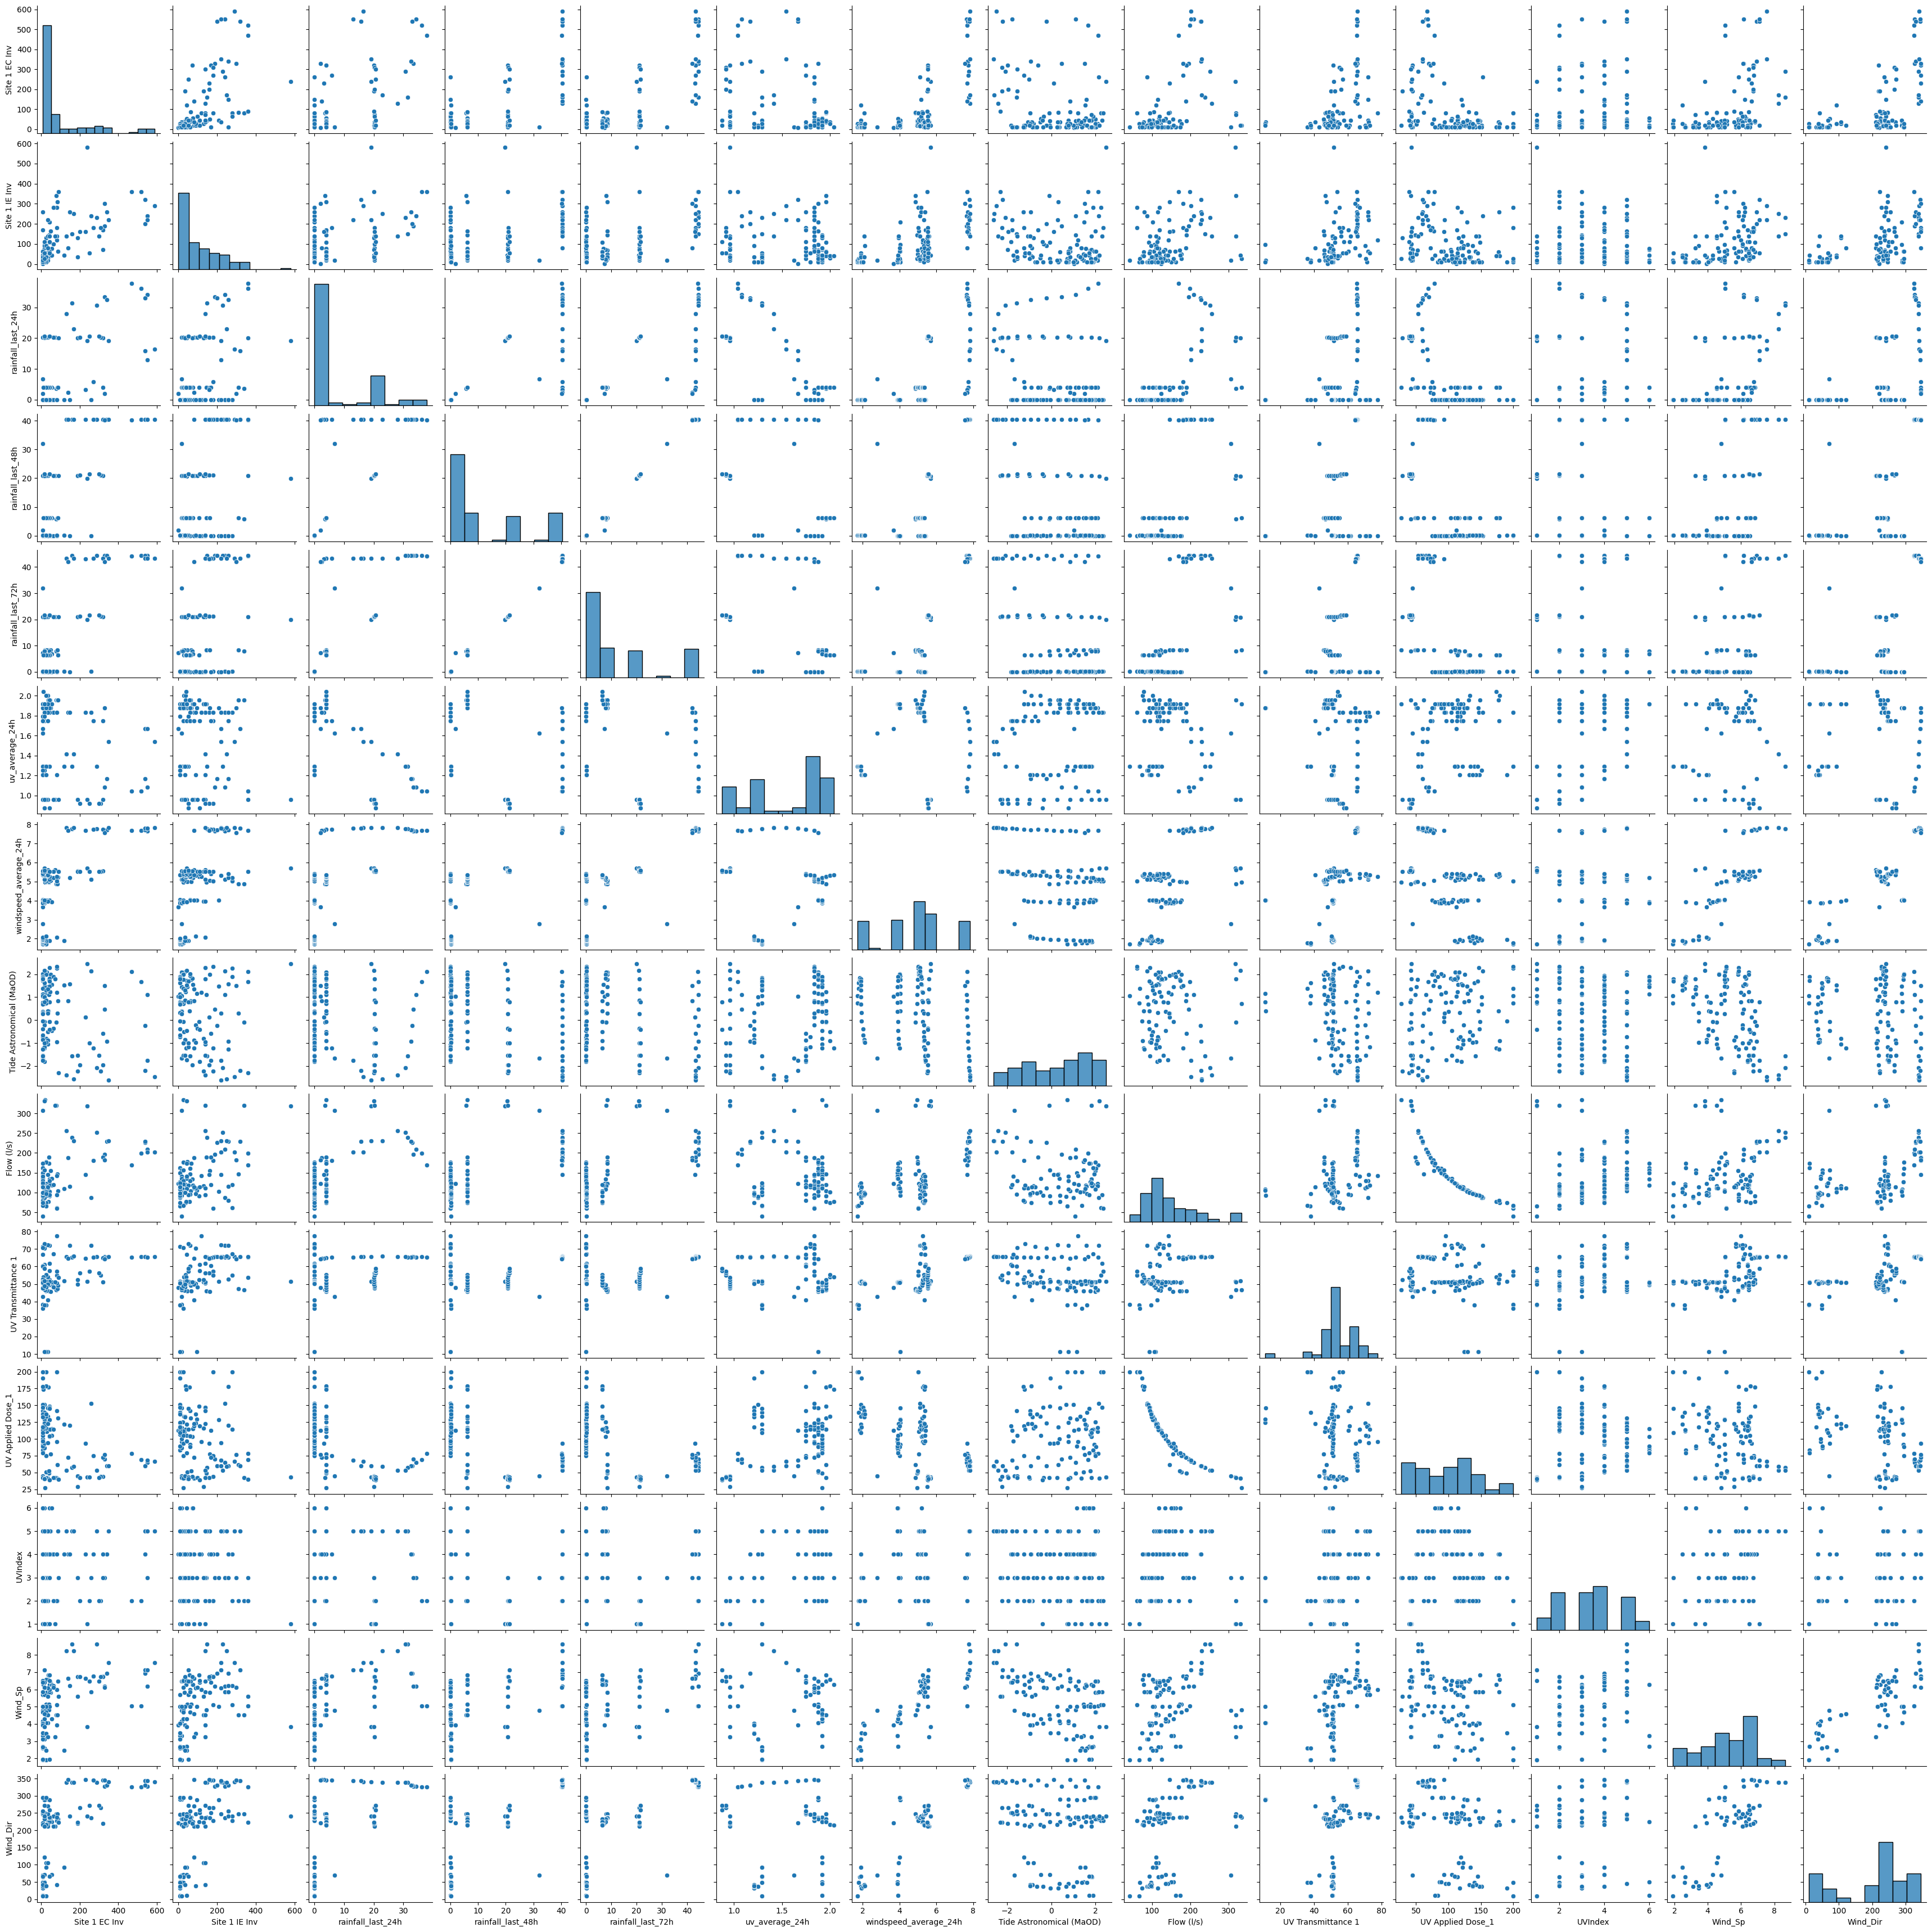

In [ ]:
#Displays correlations between each of the variables
sns.pairplot(bathingwaterquality[['Site 1 EC Inv', 'Site 1 IE Inv', 'rainfall_last_24h', 'rainfall_last_48h', 
                                  'rainfall_last_72h', 'uv_average_24h', 'windspeed_average_24h', 
                                  'Tide Astronomical (MaOD)', 'Flow (l/s)', 'UV Transmittance 1', 'UV Applied Dose_1',
                                  'UVIndex', 'Wind_Sp', 'Wind_Dir']])
plt.show()

In [ ]:
#correlation matrix
corr_matrix = bathingwaterquality.corr(numeric_only=True)
corr_matrix

,Site 1 EC Inv,Site 1 IE Inv,rainfall_last_24h,rainfall_last_48h,rainfall_last_72h,uv_average_24h,windspeed_average_24h,Tide Astronomical (MaOD),Spring High,Spring Low,Neap High,Neap low,Flow (l/s),UV Transmittance 1,UV Applied Dose_1,Hubac log (10) Gene Copies / 100ml,UVIndex,Wind_Sp,Wind_Dir
Site 1 EC Inv,1.000000,0.635935,0.663717,0.787143,0.793799,-0.296527,0.667726,-0.273005,NaN,NaN,NaN,NaN,0.429921,0.426319,-0.393279,NaN,0.027206,0.454281,0.546187
Site 1 IE Inv,0.635935,1.000000,0.440019,0.492244,0.499143,-0.105517,0.572165,-0.118557,NaN,NaN,NaN,NaN,0.413179,0.391112,-0.279105,NaN,-0.116690,0.366093,0.521053
rainfall_last_24h,0.663717,0.440019,1.000000,0.814344,0.811991,-0.656862,0.643487,-0.291260,NaN,NaN,NaN,NaN,0.619098,0.268344,-0.640702,NaN,-0.196584,0.452687,0.493960
rainfall_last_48h,0.787143,0.492244,0.814344,1.000000,0.998265,-0.406988,0.779675,-0.364089,NaN,NaN,NaN,NaN,0.635985,0.374382,-0.611571,NaN,-0.015792,0.560041,0.610536
rainfall_last_72h,0.793799,0.499143,0.811991,0.998265,1.000000,-0.385847,0.785788,-0.351292,NaN,NaN,NaN,NaN,0.636169,0.376245,-0.606224,NaN,0.003521,0.562389,0.619992
uv_average_24h,-0.296527,-0.105517,-0.656862,-0.406988,-0.385847,1.000000,0.008756,0.198860,NaN,NaN,NaN,NaN,-0.226124,-0.036328,0.357330,NaN,0.568278,0.096048,0.071049
windspeed_average_24h,0.667726,0.572165,0.643487,0.779675,0.785788,0.008756,1.000000,-0.319824,NaN,NaN,NaN,NaN,0.516362,0.525660,-0.530207,NaN,0.208417,0.824244,0.870309
Tide Astronomical (MaOD),-0.273005,-0.118557,-0.291260,-0.364089,-0.351292,0.198860,-0.319824,1.000000,NaN,NaN,NaN,NaN,-0.135902,-0.248205,0.232714,NaN,-0.036605,-0.504706,-0.196356
Spring High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spring Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


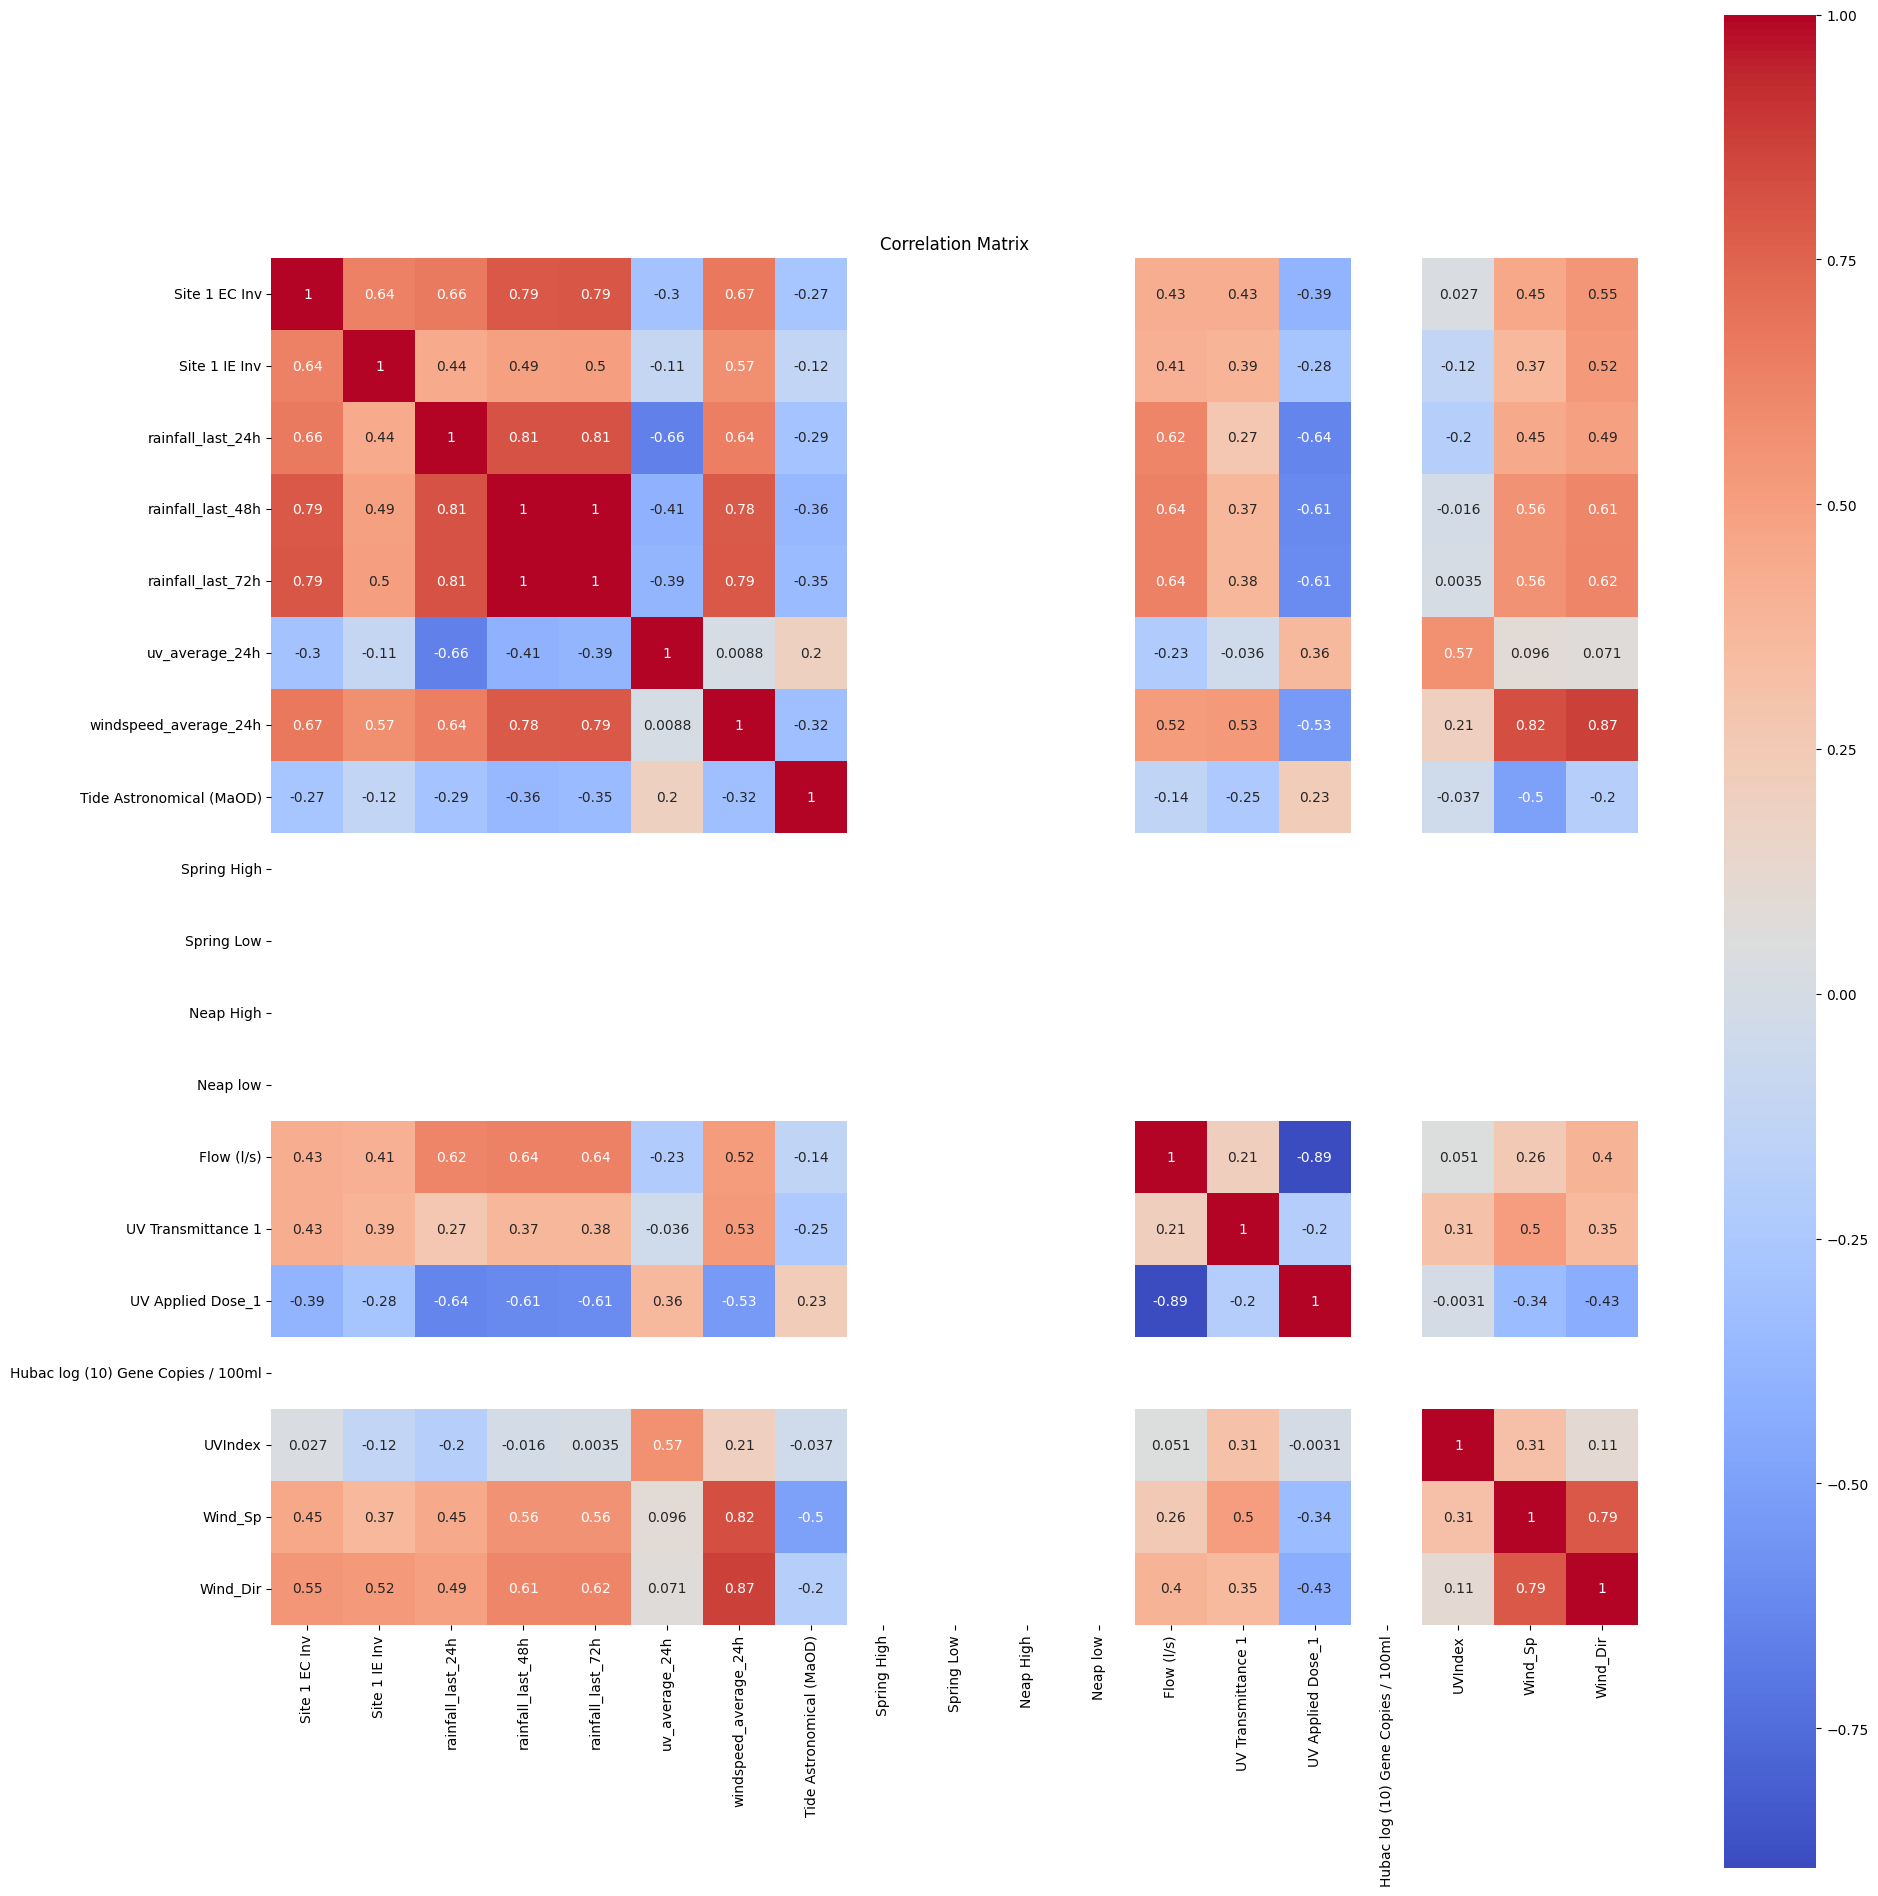

In [ ]:
#correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [ ]:
#calculates Pearson correlation coefficient and p-value
corr_coef, p_value = pearsonr(bathingwaterquality['rainfall_last_72h'], bathingwaterquality['Site 1 EC Inv'])
print(f'Pearson correlation coefficient: {corr_coef:.4f}') 
print(f'P-value: {p_value:.4e}')

Pearson correlation coefficient: 0.7938
P-value: 3.6999e-26


In [16]:
#Regression with EC
X = bathingwaterquality[['rainfall_last_72h']]
y = bathingwaterquality['Site 1 EC Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in rainfall_last_72h, EC concentration is predicted to rise by 7.1679 (p<0.05).


                            OLS Regression Results                            
Dep. Variable:          Site 1 EC Inv   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     192.5
Date:                Thu, 08 May 2025   Prob (F-statistic):           3.70e-26
Time:                        10:33:28   Log-Likelihood:                -677.93
No. Observations:                 115   AIC:                             1360.
Df Residuals:                     113   BIC:                             1365.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                16.5199     10.37

In [17]:
#Regression with EC
X = bathingwaterquality['rainfall_last_48h']
y = bathingwaterquality['Site 1 EC Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in rainfall_last_48h, EC concentration is predicted to rise by 7.5755 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 EC Inv   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     184.1
Date:                Thu, 08 May 2025   Prob (F-statistic):           1.82e-25
Time:                        10:33:28   Log-Likelihood:                -679.54
No. Observations:                 115   AIC:                             1363.
Df Residuals:                     113   BIC:                             1369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                17.9389     10.49

In [18]:
#Regression with EC
X = bathingwaterquality['rainfall_last_24h']
y = bathingwaterquality['Site 1 EC Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in rainfall_last_24h, EC concentration is predicted to rise by 9.0414 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 EC Inv   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     88.97
Date:                Thu, 08 May 2025   Prob (F-statistic):           6.28e-16
Time:                        10:33:28   Log-Likelihood:                -701.72
No. Observations:                 115   AIC:                             1407.
Df Residuals:                     113   BIC:                             1413.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                36.6731     12.39

In [19]:
#Regression with EC
X = bathingwaterquality['windspeed_average_24h']
y = bathingwaterquality['Site 1 EC Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in windspeed_average_24h, EC concentration is predicted to rise by 54.7373 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 EC Inv   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     90.92
Date:                Thu, 08 May 2025   Prob (F-statistic):           3.63e-16
Time:                        10:33:29   Log-Likelihood:                -701.17
No. Observations:                 115   AIC:                             1406.
Df Residuals:                     113   BIC:                             1412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -164.27

In [20]:
#Regression with EC
X = bathingwaterquality['Wind_Dir']
y = bathingwaterquality['Site 1 EC Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in Flow (l/s), EC concentration is predicted to rise by 0.7709 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 EC Inv   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     48.04
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.73e-10
Time:                        10:33:29   Log-Likelihood:                -714.75
No. Observations:                 115   AIC:                             1433.
Df Residuals:                     113   BIC:                             1439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -56.9002     25.788     -2.206      0.0

In [21]:
#Regression with EC
X = bathingwaterquality['UV Transmittance 1']
y = bathingwaterquality['Site 1 EC Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in UV Transmittance 1, EC concentration is predicted to rise by 5.5539 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 EC Inv   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     25.10
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.03e-06
Time:                        10:33:29   Log-Likelihood:                -723.58
No. Observations:                 115   AIC:                             1451.
Df Residuals:                     113   BIC:                             1457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -196.4228     61

In [22]:
#Regression with EC
X = bathingwaterquality['UV Applied Dose_1']
y = bathingwaterquality['Site 1 EC Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in UV Applied Dose_1, EC concentration is predicted to rise by 0.7709 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 EC Inv   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     20.68
Date:                Thu, 08 May 2025   Prob (F-statistic):           1.37e-05
Time:                        10:33:29   Log-Likelihood:                -725.46
No. Observations:                 115   AIC:                             1455.
Df Residuals:                     113   BIC:                             1460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               229.2950     30.36

In [23]:
#Regression with EC
X = bathingwaterquality['Wind_Sp']
y = bathingwaterquality['Site 1 EC Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in Wind_Sp, EC concentration is predicted to rise by 41.9533 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 EC Inv   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     29.38
Date:                Thu, 08 May 2025   Prob (F-statistic):           3.40e-07
Time:                        10:33:29   Log-Likelihood:                -721.83
No. Observations:                 115   AIC:                             1448.
Df Residuals:                     113   BIC:                             1453.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -116.5151     42.351     -2.751      0.0

In [ ]:
#counts NAs
bathingwaterquality['Flow (l/s)'].isna().value_counts()

Flow (l/s)
False    100
True      15
Name: count, dtype: int64

In [25]:
# #Regression with EC - contains NAs or infs so can't do?
# X = bathingwaterquality['Flow (l/s)']
# y = bathingwaterquality['Site 1 EC Inv']

# X = sm.add_constant(X) 
# model = sm.OLS(y, X).fit()

# print(model.summary())

# #Results: 
# #For each 1 increase in Flow (l/s), EC concentration is predicted to rise by 41.9533 (p<0.05).

Now individual relationships with the IE bacteria

In [26]:
#Regression with IE
X = bathingwaterquality['rainfall_last_72h']
y = bathingwaterquality['Site 1 IE Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in rainfall_last_72h, IE concentration is predicted to rise by 3.3184 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 IE Inv   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     37.49
Date:                Thu, 08 May 2025   Prob (F-statistic):           1.36e-08
Time:                        10:33:29   Log-Likelihood:                -683.43
No. Observations:                 115   AIC:                             1371.
Df Residuals:                     113   BIC:                             1376.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                69.9895     10.88

In [27]:
#Regression with IE
X = bathingwaterquality['rainfall_last_48h']
y = bathingwaterquality['Site 1 IE Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in rainfall_last_48h, IE concentration is predicted to rise by 3.4879 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 IE Inv   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     36.14
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.30e-08
Time:                        10:33:29   Log-Likelihood:                -683.95
No. Observations:                 115   AIC:                             1372.
Df Residuals:                     113   BIC:                             1377.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                70.8636     10.90

In [28]:
#Regression with IE
X = bathingwaterquality['rainfall_last_24h']
y = bathingwaterquality['Site 1 IE Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in rainfall_last_24h, IE concentration is predicted to rise by 4.4132 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 IE Inv   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     27.13
Date:                Thu, 08 May 2025   Prob (F-statistic):           8.63e-07
Time:                        10:33:29   Log-Likelihood:                -687.53
No. Observations:                 115   AIC:                             1379.
Df Residuals:                     113   BIC:                             1385.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                77.6396     10.95

In [29]:
#Regression with IE
X = bathingwaterquality['windspeed_average_24h']
y = bathingwaterquality['Site 1 IE Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in windspeed_average_24h, IE concentration is predicted to rise by 34.5329 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 IE Inv   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     55.00
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.39e-11
Time:                        10:33:29   Log-Likelihood:                -677.10
No. Observations:                 115   AIC:                             1358.
Df Residuals:                     113   BIC:                             1364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -58.67

In [30]:
#Regression with IE
X = bathingwaterquality['Wind_Dir']
y = bathingwaterquality['Site 1 IE Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in Wind_Dir, IE concentration is predicted to rise by 0.5415 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 IE Inv   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     42.11
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.37e-09
Time:                        10:33:29   Log-Likelihood:                -681.69
No. Observations:                 115   AIC:                             1367.
Df Residuals:                     113   BIC:                             1373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3955     19.346     -0.124      0.9

In [31]:
#Regression with IE
X = bathingwaterquality['UV Applied Dose_1']
y = bathingwaterquality['Site 1 IE Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in UV Applied Dose_1, IE concentration is predicted to decrease by -0.6645 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 IE Inv   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     9.546
Date:                Thu, 08 May 2025   Prob (F-statistic):            0.00252
Time:                        10:33:29   Log-Likelihood:                -695.24
No. Observations:                 115   AIC:                             1394.
Df Residuals:                     113   BIC:                             1400.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               175.9882     23.34

In [32]:
#Regression with IE
X = bathingwaterquality['UV Transmittance 1']
y = bathingwaterquality['Site 1 IE Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in UV Transmittance 1, IE concentration is predicted to decrease by -0.6645 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 IE Inv   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     20.41
Date:                Thu, 08 May 2025   Prob (F-statistic):           1.55e-05
Time:                        10:33:29   Log-Likelihood:                -690.36
No. Observations:                 115   AIC:                             1385.
Df Residuals:                     113   BIC:                             1390.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -92.3180     45

In [33]:
#Regression with IE
X = bathingwaterquality['Wind_Sp']
y = bathingwaterquality['Site 1 IE Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in Wind_Sp, IE concentration is predicted to rise by 24.8920 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 IE Inv   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     17.49
Date:                Thu, 08 May 2025   Prob (F-statistic):           5.73e-05
Time:                        10:33:29   Log-Likelihood:                -691.63
No. Observations:                 115   AIC:                             1387.
Df Residuals:                     113   BIC:                             1393.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.2791     32.571     -0.623      0.5

In [34]:
#Regression with IE
X = bathingwaterquality['Wind_Dir']
y = bathingwaterquality['Site 1 IE Inv']

X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

print(model.summary())

#Results: 
#For each 1 increase in Wind_Dir, IE concentration is predicted to rise by 0.5414 (p<0.05).

                            OLS Regression Results                            
Dep. Variable:          Site 1 IE Inv   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     42.11
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.37e-09
Time:                        10:33:29   Log-Likelihood:                -681.69
No. Observations:                 115   AIC:                             1367.
Df Residuals:                     113   BIC:                             1373.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3955     19.346     -0.124      0.9

Multiple model for EC

In [ ]:
#Multiple model with all
X = bathingwaterquality[['rainfall_last_24h', 'windspeed_average_24h', 'UV Transmittance 1' , 'UV Applied Dose_1',
                         'Wind_Dir']]
y = bathingwaterquality['Site 1 EC Inv']


X = sm.add_constant(X)  
mult_reg_model = sm.OLS(y, X).fit()

print(mult_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Site 1 EC Inv   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     28.24
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.92e-18
Time:                        10:33:29   Log-Likelihood:                -687.34
No. Observations:                 115   AIC:                             1387.
Df Residuals:                     109   BIC:                             1403.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -226.07

In [36]:
#second model removed Wind_Dir
X = bathingwaterquality[['rainfall_last_24h', 'windspeed_average_24h', 'UV Transmittance 1' , 'UV Applied Dose_1']]
y = bathingwaterquality['Site 1 EC Inv']


X = sm.add_constant(X) 
mult_reg_model = sm.OLS(y, X).fit()

print(mult_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Site 1 EC Inv   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     35.59
Date:                Thu, 08 May 2025   Prob (F-statistic):           4.68e-19
Time:                        10:33:29   Log-Likelihood:                -687.37
No. Observations:                 115   AIC:                             1385.
Df Residuals:                     110   BIC:                             1398.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -226.17

In [37]:
#final model removed Wind_Dir and UV Applied Dose_1
X = bathingwaterquality[['rainfall_last_24h', 'windspeed_average_24h', 'UV Transmittance 1']]
y = bathingwaterquality['Site 1 EC Inv']


X = sm.add_constant(X) 
mult_reg_model = sm.OLS(y, X).fit()

print(mult_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Site 1 EC Inv   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     46.01
Date:                Thu, 08 May 2025   Prob (F-statistic):           2.12e-19
Time:                        10:33:29   Log-Likelihood:                -688.66
No. Observations:                 115   AIC:                             1385.
Df Residuals:                     111   BIC:                             1396.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -169.80

Checking model assumptions

In [ ]:
# VIF - variance inflaction factor check
vif_data_EC = pd.DataFrame()
vif_data_EC['Variable'] = X.columns
vif_data_EC['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data_EC)


                Variable        VIF
0                  const  25.754900
1      rainfall_last_24h   1.726605
2  windspeed_average_24h   2.214060
3     UV Transmittance 1   1.397937


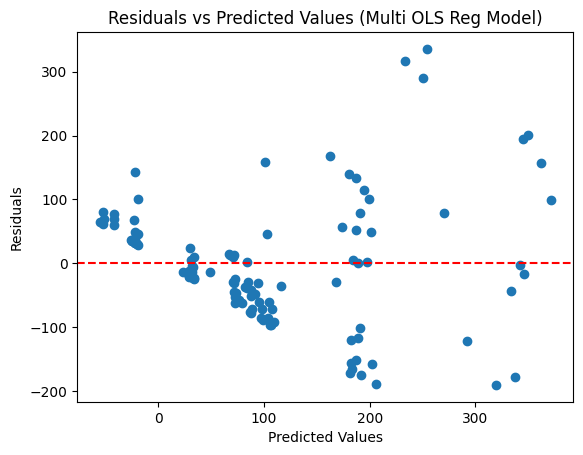

In [39]:
#Linearity check

y_pred = mult_reg_model.predict(X)
residuals_mult = bathingwaterquality['Site 1 EC Inv'] - y_pred

plt.scatter(y_pred, residuals_mult)
plt.axhline(0, color='Red', linestyle='--') # Make the line red
plt.title('Residuals vs Predicted Values (Multi OLS Reg Model)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#shows heteroskedascity


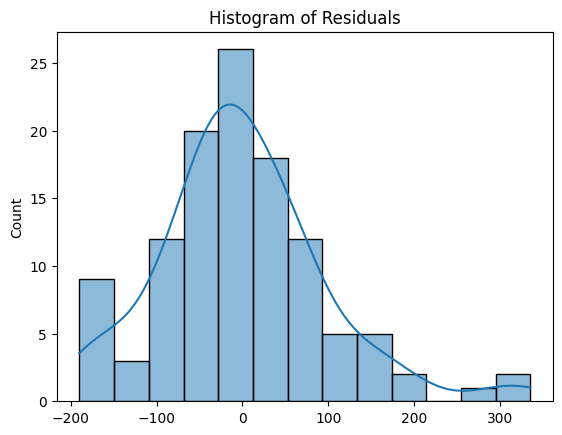

In [40]:
# Histogram of residuals
sns.histplot(residuals_mult, kde=True)
plt.title('Histogram of Residuals')
plt.show()

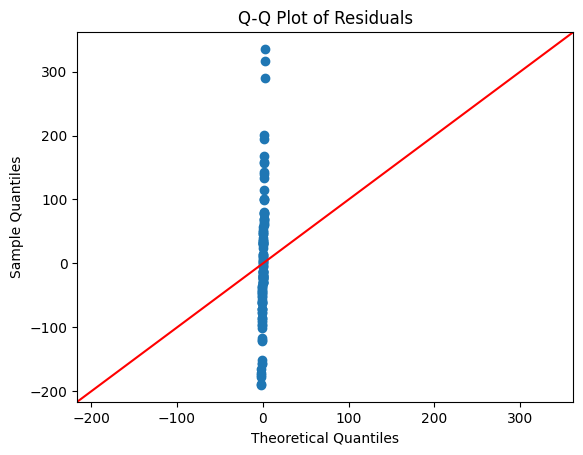

In [41]:
#Q-Q plot of residuals
sm.qqplot(residuals_mult, line='45') 
plt.title('Q-Q Plot of Residuals')
plt.show()

#deviates completely from normality line

Multiple model for IE


In [42]:
#first model with all
X = bathingwaterquality[['rainfall_last_24h', 'windspeed_average_24h', 'UV Transmittance 1',
                         'Wind_Dir']]
y = bathingwaterquality['Site 1 IE Inv']


X = sm.add_constant(X)  
mult_reg_model = sm.OLS(y, X).fit()

print(mult_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Site 1 IE Inv   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     15.46
Date:                Thu, 08 May 2025   Prob (F-statistic):           4.62e-10
Time:                        10:33:30   Log-Likelihood:                -674.26
No. Observations:                 115   AIC:                             1359.
Df Residuals:                     110   BIC:                             1372.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -92.81

In [43]:
#final model removing windspeed_average_24h
X = bathingwaterquality[['rainfall_last_24h', 'UV Transmittance 1',
                         'Wind_Dir']]
y = bathingwaterquality['Site 1 IE Inv']


X = sm.add_constant(X)  
mult_reg_model = sm.OLS(y, X).fit()

print(mult_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Site 1 IE Inv   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     20.35
Date:                Thu, 08 May 2025   Prob (F-statistic):           1.40e-10
Time:                        10:33:30   Log-Likelihood:                -674.70
No. Observations:                 115   AIC:                             1357.
Df Residuals:                     111   BIC:                             1368.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -89.4914     41

In [44]:
# VIF
vif_data_IE = pd.DataFrame()
vif_data_IE['Variable'] = X.columns
vif_data_IE['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data_IE)

             Variable        VIF
0               const  25.557848
1   rainfall_last_24h   1.340457
2  UV Transmittance 1   1.158590
3            Wind_Dir   1.422164


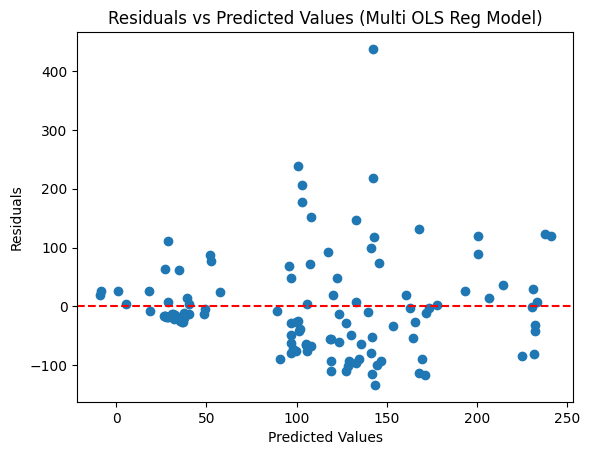

In [45]:
#Linearity check
y_pred = mult_reg_model.predict(X)
residuals_mult = bathingwaterquality['Site 1 IE Inv'] - y_pred

plt.scatter(y_pred, residuals_mult)
plt.axhline(0, color='Red', linestyle='--') # Make the line red
plt.title('Residuals vs Predicted Values (Multi OLS Reg Model)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

#bit more homoskedacity - the resisuals are more spread across zero line

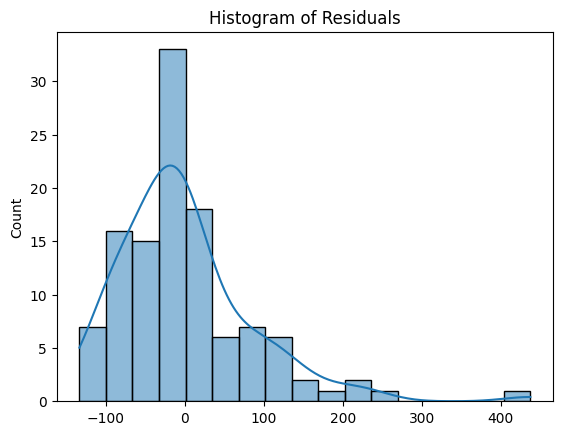

In [46]:
# Histogram of residuals
sns.histplot(residuals_mult, kde=True)
plt.title('Histogram of Residuals')
plt.show()

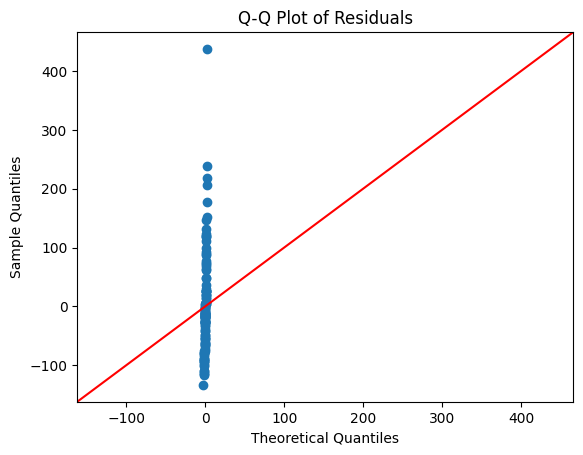

In [47]:
#Q-Q plot of residuals
sm.qqplot(residuals_mult, line='45') 
plt.title('Q-Q Plot of Residuals')
plt.show()